In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import cv2


from sklearn.model_selection import train_test_split

# 데이터셋 생성

In [29]:
import os
X = np.empty((160, 120, 120, 3))
Y = np.empty((160,))

files = os.listdir('./images/Motorcycle')
for i in range(80):
    X[i] = cv2.imread(f"./images/Motorcycle/{files[i]}")
    Y[i] = 1

files = os.listdir('./images/Other')
for i in range(80):
    X[i+80] = cv2.imread(f"./images/Other/{files[i]}")
    Y[i+80] = 0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [31]:
print(X_train.shape)
print(X_test.shape)
print( y_train.shape)
print(y_test.shape)

(120, 120, 120, 3)
(40, 120, 120, 3)
(120,)
(40,)


# 모델 생성

In [32]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(120, 120, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
modelpath="./motorcycle.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [35]:

history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 35.00103, saving model to .\motorcycle.hdf5

Epoch 2: val_loss improved from 35.00103 to 22.85625, saving model to .\motorcycle.hdf5

Epoch 3: val_loss improved from 22.85625 to 1.29413, saving model to .\motorcycle.hdf5

Epoch 4: val_loss did not improve from 1.29413

Epoch 5: val_loss improved from 1.29413 to 0.70350, saving model to .\motorcycle.hdf5

Epoch 6: val_loss did not improve from 0.70350

Epoch 7: val_loss improved from 0.70350 to 0.67399, saving model to .\motorcycle.hdf5

Epoch 8: val_loss did not improve from 0.67399

Epoch 9: val_loss did not improve from 0.67399

Epoch 10: val_loss did not improve from 0.67399

Epoch 11: val_loss did not improve from 0.67399

Epoch 12: val_loss did not improve from 0.67399

Epoch 13: val_loss did not improve from 0.67399

Epoch 14: val_loss did not improve from 0.67399

Epoch 15: val_loss did not improve from 0.67399

Epoch 16: val_loss did not improve from 0.67399

Epoch 17: val_loss did not im

In [36]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

2/2 [==============================] - 0s 31ms/step - loss: 0.6932 - accuracy: 0.4750

 Test Accuracy: 0.4750


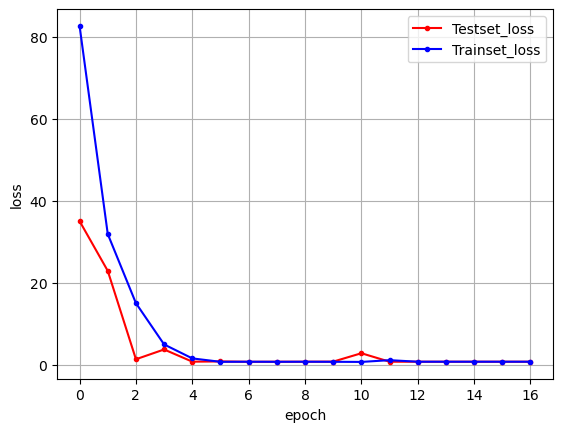

In [37]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [38]:
model.save("motorcycle.h5")